## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mice_count = len(merge_df['Mouse ID'].unique())
mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df[merge_df.duplicated()]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
merge_df_new = merge_df[['Mouse ID','Timepoint','Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
                                 'Tumor Volume (mm3)', 'Metastatic Sites']]
merge_df_new

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [6]:
merge_df_new.columns

Index(['Mouse ID', 'Timepoint', 'Drug Regimen', 'Sex', 'Age_months',
       'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [7]:
merge_df['Mouse ID'].dtype

dtype('O')

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_list = merge_df.loc[(merge_df['Mouse ID'] == 'g989'),:]
duplicate_mice_list

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df_new.drop(merge_df_new[merge_df_new['Mouse ID'] == 'g989'].index, inplace=False)
clean_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_df_mice = len(clean_df['Mouse ID'].unique())
clean_df_mice

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [12]:
# Create a subset of database containing Mouse ID, Tumor Volume(mm3), and Drug Region
# create a list of the columns 
columns = ['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']

# create a new df for the mouse ID with the columns
drug_region_df = clean_df.loc[:,columns]
drug_region_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,45.000000
1,k403,Ramicane,38.825898
2,k403,Ramicane,35.014271
3,k403,Ramicane,34.223992
4,k403,Ramicane,32.997729
...,...,...,...
1888,z969,Naftisol,63.145652
1889,z969,Naftisol,65.841013
1890,z969,Naftisol,69.176246
1891,z969,Naftisol,70.314904


In [13]:
#Create a summary statistics table - stat1
drug_region_dfstat1 = drug_region_df.groupby(['Drug Regimen']).describe()
drug_region_dfstat1
#drug_region_dfstat1.columns

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  148.0  52.320930  6.622085  45.000000  46.894328   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.446266  56.491585  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

In [14]:
columns2 = [('Tumor Volume (mm3)',  'mean'),
            ('Tumor Volume (mm3)',   'std'),
            ('Tumor Volume (mm3)',   '50%')]

drug_region_dfstat11 = drug_region_dfstat1.loc[:,columns2]
drug_region_dfstat11

Tumor Volume (mm3)                     
                           mean       std        50%
Drug Regimen                                        
Capomulin             40.675741  4.994774  41.557809
Ceftamin              52.591172  6.268188  51.776157
Infubinol             52.884795  6.567243  51.820584
Ketapril              55.235638  8.279709  53.698743
Naftisol              54.331565  8.134708  52.509285
Placebo               54.033581  7.821003  52.288934
Propriva              52.320930  6.622085  50.446266
Ramicane              40.216745  4.846308  40.673236
Stelasyn              54.233149  7.710419  52.431737
Zoniferol             53.236507  6.966589  51.818479

In [15]:
#Rename the column names in the stat1 table
#drug_region_dfstat1 = drug_region_dfstat1.rename(columns={"mean":"Tumor Volume Mean","50%":"Tumor Volume Median",
#                                                          "std":"Tumor Volume Std. Dev.",
#"min":"Tumor Volume Min.","max":"Tumor Volume Max.",
#"count":"Tumor Volume Count","25%":"Tumor Volume 25%","75%":"Tumor Volume 75%"})

#drug_region_dfstat1

In [16]:
#Create a statistical table for variance - stat2
drug_region_dfstat2 = drug_region_df.groupby(['Drug Regimen']).var()
drug_region_dfstat2 = drug_region_dfstat2.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"})
drug_region_dfstat2

,Tumor Volume Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [17]:
#Create a statistical table for SEM  - stat3
drug_region_dfstat3 = drug_region_df.groupby(['Drug Regimen']).sem()
drug_region_dfstat3 = drug_region_dfstat3.rename(columns={"Tumor Volume (mm3)":"Tumor Volume SEM"})
drug_region_dfstat3

,Tumor Volume SEM
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [18]:
# Merge Stat1, Stat2, Stat3 to one table
merge_drug_region_dfstat = pd.merge(pd.merge(drug_region_dfstat2, drug_region_dfstat3, on='Drug Regimen'),drug_region_dfstat11,on='Drug Regimen')
merge_drug_region_dfstat = merge_drug_region_dfstat.rename(columns={('Tumor Volume (mm3)', 'mean'):"Tumor Volume Mean",('Tumor Volume (mm3)', '50%'):"Tumor Volume Median",
                                                                    ('Tumor Volume (mm3)', 'std'):"Tumor Volume Std. Dev."})
merge_drug_region_dfstat

C:\Users\yings\AppData\Local\Temp/ipykernel_29816/3182931658.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  merge_drug_region_dfstat = pd.merge(pd.merge(drug_region_dfstat2, drug_region_dfstat3, on='Drug Regimen'),drug_region_dfstat11,on='Drug Regimen')


,Tumor Volume Variance,Tumor Volume SEM,Tumor Volume Mean,Tumor Volume Std. Dev.,Tumor Volume Median
Drug Regimen,,,,,
Capomulin,24.947764,0.329346,40.675741,4.994774,41.557809
Ceftamin,39.290177,0.469821,52.591172,6.268188,51.776157
Infubinol,43.128684,0.492236,52.884795,6.567243,51.820584
Ketapril,68.553577,0.603860,55.235638,8.279709,53.698743
Naftisol,66.173479,0.596466,54.331565,8.134708,52.509285
Placebo,61.168083,0.581331,54.033581,7.821003,52.288934
Propriva,43.852013,0.544332,52.320930,6.622085,50.446266
Ramicane,23.486704,0.320955,40.216745,4.846308,40.673236
Stelasyn,59.450562,0.573111,54.233149,7.710419,52.431737


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#Based on the subset dataframe created that include three columns: Mouse ID, Drug Regimen and Tumor Volume (mm3)
drug_region_df_stat4 = drug_region_df.groupby(['Drug Regimen']).agg(['mean','median','std','var','sem'])
drug_region_df_stat4 = drug_region_df_stat4.rename(columns={"Tumor Volume (mm3)":" ","mean":"Tumor Volume Mean","median":"Tumor Volume Median","std":"Tumor Volume Std. Dev.","var":"Tumor Volume Variance","sem":"Tumor Volume Std. Err."})
drug_region_df_stat4


\
             Tumor Volume Mean Tumor Volume Median Tumor Volume Std. Dev.   
Drug Regimen                                                                
Capomulin            40.675741           41.557809               4.994774   
Ceftamin             52.591172           51.776157               6.268188   
Infubinol            52.884795           51.820584               6.567243   
Ketapril             55.235638           53.698743               8.279709   
Naftisol             54.331565           52.509285               8.134708   
Placebo              54.033581           52.288934               7.821003   
Propriva             52.320930           50.446266               6.622085   
Ramicane             40.216745           40.673236               4.846308   
Stelasyn             54.233149           52.431737               7.710419   
Zoniferol            53.236507           51.818479               6.966589   

                                                           
             Tumor Volume Variance Tumor Volume Std. Err.  
Drug Regimen                                               
Capomulin                24.947764               0.329346  
Ceftamin                 39.290177               0.469821  
Infubinol                43.128684               0.492236  
Ketapril                 68.553577               0.603860  
Naftisol                 66.173479               0.596466  
Placebo                  61.168083               0.581331  
Propriva                 43.852013               0.544332  
Ramicane                 23.486704               0.320955  
Stelasyn                 59.450562               0.573111  
Zoniferol                48.533355               0.516398

## Bar and Pie Charts

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

import pandas as pd
 

In [22]:
# Create a subset of database containing Mouse ID, Tumor Volume(mm3), and Drug Region
# create a list of the columns 
columns = ['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']

# create a new df for the mouse ID with the columns
drug_region_df = clean_df.loc[:,columns]
drug_region_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,45.000000
1,k403,Ramicane,38.825898
2,k403,Ramicane,35.014271
3,k403,Ramicane,34.223992
4,k403,Ramicane,32.997729
...,...,...,...
1888,z969,Naftisol,63.145652
1889,z969,Naftisol,65.841013
1890,z969,Naftisol,69.176246
1891,z969,Naftisol,70.314904


In [23]:
#Summarize the total of timepoint by drug regimen 
#drug_region_df_sum = drug_region_timepoint_df.groupby(['Drug Regimen'])['Mouse ID'].unique()
drug_region_df_sum = drug_region_df.groupby(['Drug Regimen'])['Mouse ID'].count()
drug_region_df_sum

# Checking the number of drug regimen in the clean DataFrame.
#drug_region_timepoint_df['Drug Regimen'].unique()
#drug_region_df_sum['Timepoint'].unique()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [24]:
# Checking the number of drug regimen in the clean DataFrame.
#drug_region_df_sum['Drug Regimen'].unique()
#drug_region_df_sum.head()

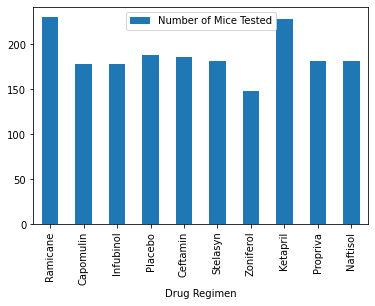

In [25]:
df_bar_plot = pd.DataFrame({'Drug Regimen':['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin','Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
                            'Number of Mice Tested':[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]})
ax = df_bar_plot.plot.bar(x='Drug Regimen', y='Number of Mice Tested', rot=90)


<IPython.core.display.Javascript object>


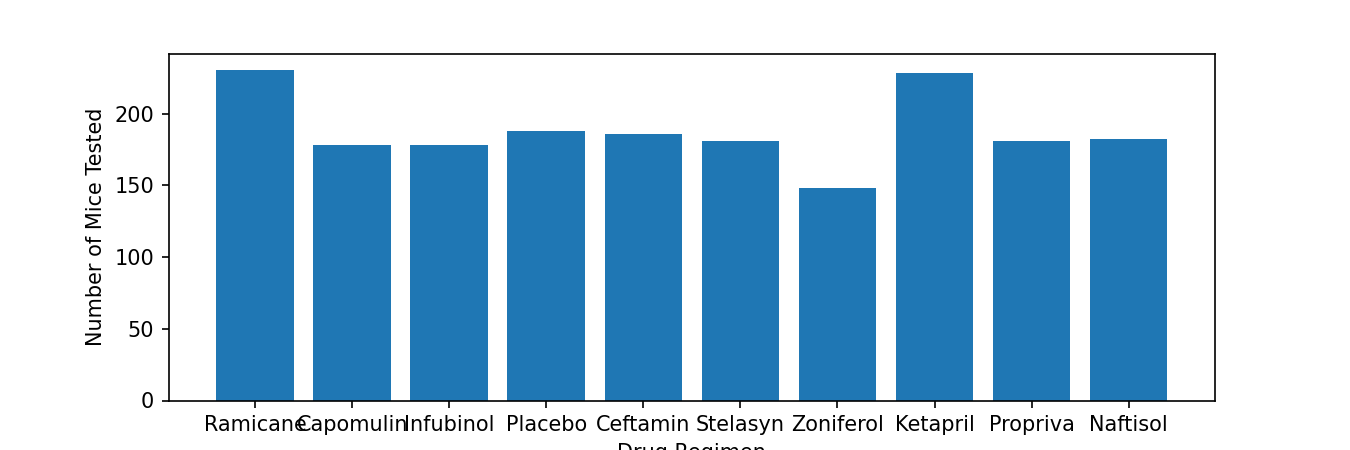

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

Drug_Regimen = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin','Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
Number_of_mice_tested = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

plt.figure(figsize=(9,3))

plt.bar(Drug_Regimen, Number_of_mice_tested)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import pandas as pd


In [28]:
# Create a subset of database containing Mouse ID, 
# create a list of the columns 
columns = ['Mouse ID', 'Sex']

# create a new df for the mouse ID with the columns
mice_sex_df = clean_df.loc[:,columns]
mice_sex_df

,Mouse ID,Sex
0,k403,Male
1,k403,Male
2,k403,Male
3,k403,Male
4,k403,Male
...,...,...
1888,z969,Male
1889,z969,Male
1890,z969,Male
1891,z969,Male


In [29]:
mice_sex_df1 = mice_sex_df.groupby(['Sex']).count()
mice_sex_df1


,Mouse ID
Sex,
Female,922
Male,958


<IPython.core.display.Javascript object>


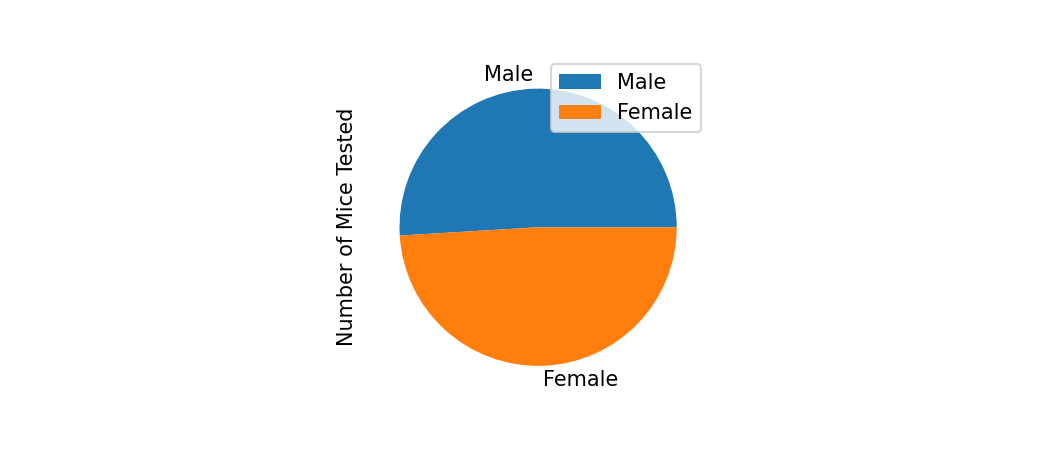

In [30]:
# Method 1 - work -? how to add title and place legend in the upper right corner
df_pie_plot = pd.DataFrame({'Sex':['Male', 'Female'],'Number of Mice Tested':[958,922]},
                          index=['Male', "Female"])
pie = df_pie_plot.plot.pie(y ='Number of Mice Tested',figsize=(7,3))
ax.legend(loc='upper right',bbox_to_anchor=(0.5,0.5))


In [31]:
# Method 2 - not work
#df_pie_plot = pd.DataFrame.groupby(mice_sex_df['Sex']).count().plot(kind='pie',y = 'sex',index =['Male','Female'])
# pie = df_pie_plot.plot.pie(y ='Number of Mice Tested', figsize=(6,3))

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


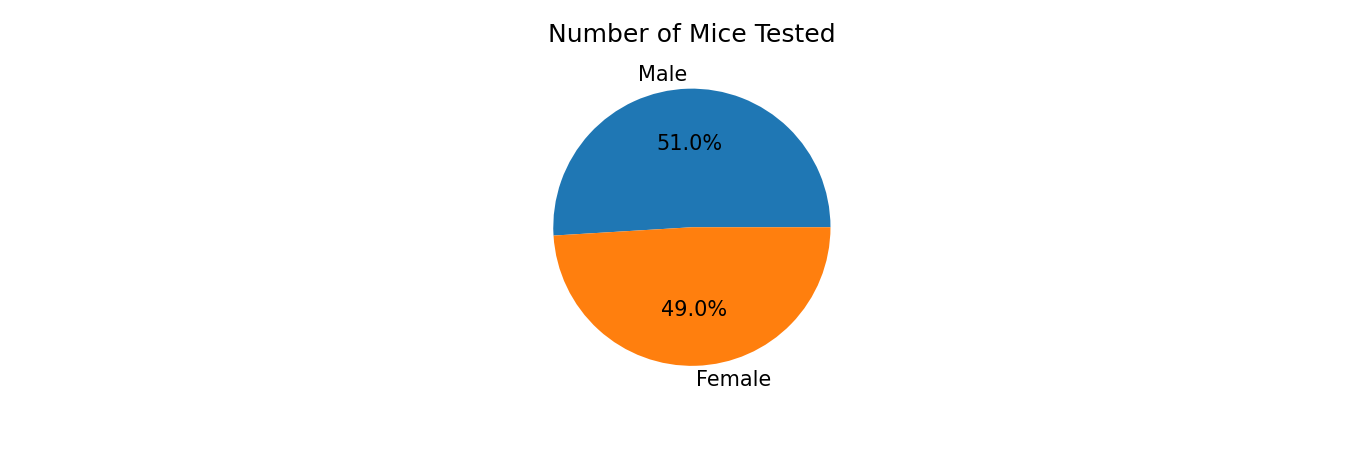

In [33]:
Sex = 'Male', 'Female'
Number_of_mice_tested = [958,922]

plt.figure(figsize=(9,3))

plt.pie(Number_of_mice_tested,labels=Sex,autopct='%1.1f%%')
plt.title("Number of Mice Tested")
plt.show()

In [34]:
clean_df.columns

Index(['Mouse ID', 'Timepoint', 'Drug Regimen', 'Sex', 'Age_months',
       'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

import pandas as pd

columns1 = ['Mouse ID', 'Drug Regimen','Timepoint', 'Sex','Tumor Volume (mm3)']

# create data subset1 - Capomulin
Regimen1_Capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin',columns1]
Regimen1_Capomulin_df

,Mouse ID,Drug Regimen,Timepoint,Sex,Tumor Volume (mm3)
10,s185,Capomulin,0,Female,45.000000
11,s185,Capomulin,5,Female,43.878496
12,s185,Capomulin,10,Female,37.614948
13,s185,Capomulin,15,Female,38.177232
14,s185,Capomulin,20,Female,36.866876
...,...,...,...,...,...
440,i557,Capomulin,45,Female,47.685963
1452,r157,Capomulin,0,Male,45.000000
1453,r157,Capomulin,5,Male,45.597064
1454,r157,Capomulin,10,Male,46.059608


In [37]:
#find the unique value by mouse ID
#MouseID1 = Regimen1_Capomulin_df['Mouse ID'].unique()
#MouseID1

In [38]:
#Identify the unique values by Timepoint
#Timepoint1 = Regimen1_Capomulin_df['Timepoint'].unique()
#Timepoint1

In [39]:
#Regimen1_sort = Regimen1_Capomulin_df.sort_values(['Mouse ID','Timepoint'],ascending=[True, False])
#Regimen1_sort

In [40]:
Regimen1_sort = Regimen1_Capomulin_df.sort_values(['Mouse ID','Timepoint'],ascending=[True, False],na_position ='first')
Regimen1_sort_df = Regimen1_sort.reset_index(drop=True)
Regimen1_sort_df

,Mouse ID,Drug Regimen,Timepoint,Sex,Tumor Volume (mm3)
0,b128,Capomulin,45,Female,38.982878
1,b128,Capomulin,40,Female,38.379726
2,b128,Capomulin,35,Female,37.967644
3,b128,Capomulin,30,Female,40.605335
4,b128,Capomulin,25,Female,43.262145
...,...,...,...,...,...
225,y793,Capomulin,20,Male,40.716428
226,y793,Capomulin,15,Male,42.283665
227,y793,Capomulin,10,Male,41.630010
228,y793,Capomulin,5,Male,41.019913


In [64]:
#Regimen 1 - print the first line of records by mouse ID
Regimen1_latest = Regimen1_sort_df.groupby(['Mouse ID']).head(1)
Regimen1_latest
#Regimen1_latest.count()

Mouse ID              25
Drug Regimen          25
Timepoint             25
Sex                   25
Tumor Volume (mm3)    25
dtype: int64

In [42]:
# create data subset2 - Regimen2_Ramicane
Regimen2_Ramicane_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane',columns1]
Regimen2_Ramicane_df

,Mouse ID,Drug Regimen,Timepoint,Sex,Tumor Volume (mm3)
0,k403,Ramicane,0,Male,45.000000
1,k403,Ramicane,5,Male,38.825898
2,k403,Ramicane,10,Male,35.014271
3,k403,Ramicane,15,Male,34.223992
4,k403,Ramicane,20,Male,32.997729
...,...,...,...,...,...
449,w678,Ramicane,5,Female,43.166373
450,y449,Ramicane,0,Male,45.000000
451,y449,Ramicane,5,Male,45.877545
452,y449,Ramicane,10,Male,46.378092


In [43]:
#Regimen 2 - sort the list by mouse ID (ascending) and Timepoint (descending)
Regimen2_sort = Regimen2_Ramicane_df.sort_values(['Mouse ID','Timepoint'],ascending=[True, False],na_position ='first')
Regimen2_sort_df = Regimen2_sort.reset_index(drop=True)
Regimen2_sort_df

,Mouse ID,Drug Regimen,Timepoint,Sex,Tumor Volume (mm3)
0,a411,Ramicane,45,Male,38.407618
1,a411,Ramicane,40,Male,40.258818
2,a411,Ramicane,35,Male,39.717236
3,a411,Ramicane,30,Male,39.130737
4,a411,Ramicane,25,Male,38.701438
...,...,...,...,...,...
223,z578,Ramicane,20,Male,36.890016
224,z578,Ramicane,15,Male,38.688516
225,z578,Ramicane,10,Male,42.952118
226,z578,Ramicane,5,Male,42.188787


In [63]:
#Regimen 2 - print the first line of records by mouse ID
Regimen2_latest = Regimen2_sort_df.groupby(['Mouse ID']).head(1)
Regimen2_latest
#Regimen2_latest.count()

Mouse ID              25
Drug Regimen          25
Timepoint             25
Sex                   25
Tumor Volume (mm3)    25
dtype: int64

In [62]:
# create data subset3 - Regimen3_Infubinol
Regimen3_Infubinol_df = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol',columns1]
Regimen3_Infubinol_df

Mouse ID              178
Drug Regimen          178
Timepoint             178
Sex                   178
Tumor Volume (mm3)    178
dtype: int64

In [46]:
#Regimen 3 - sort the list by mouse ID (ascending) and Timepoint (descending)
Regimen3_sort = Regimen3_Infubinol_df.sort_values(['Mouse ID','Timepoint'],ascending=[True, False],na_position ='first')
Regimen3_sort_df = Regimen3_sort.reset_index(drop=True)
Regimen3_sort_df

,Mouse ID,Drug Regimen,Timepoint,Sex,Tumor Volume (mm3)
0,a203,Infubinol,45,Female,67.973419
1,a203,Infubinol,40,Female,63.593490
2,a203,Infubinol,35,Female,61.931650
3,a203,Infubinol,30,Female,59.523197
4,a203,Infubinol,25,Female,56.793208
...,...,...,...,...,...
173,z581,Infubinol,20,Female,51.807944
174,z581,Infubinol,15,Female,51.196304
175,z581,Infubinol,10,Female,50.478750
176,z581,Infubinol,5,Female,49.273092


In [61]:
#Regimen 3 - print the first line of records by mouse ID
Regimen3_latest = Regimen3_sort_df.groupby(['Mouse ID']).head(1)
Regimen3_latest
#Regimen3_latest.count()

Mouse ID              25
Drug Regimen          25
Timepoint             25
Sex                   25
Tumor Volume (mm3)    25
dtype: int64

In [60]:
# create data subset4 - Regimen4_Capomulin
Regimen4_Capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin',columns1]
Regimen4_Capomulin_df

,Mouse ID,Drug Regimen,Timepoint,Sex,Tumor Volume (mm3)
484,a275,Ceftamin,0,Female,45.000000
485,a275,Ceftamin,5,Female,46.795257
486,a275,Ceftamin,10,Female,47.371343
487,a275,Ceftamin,15,Female,49.734404
488,a275,Ceftamin,20,Female,50.513437
...,...,...,...,...,...
1851,y865,Ceftamin,25,Male,57.173538
1852,y865,Ceftamin,30,Male,59.033275
1853,y865,Ceftamin,35,Male,61.153140
1854,y865,Ceftamin,40,Male,63.469549


In [57]:
#Regimen 4 - sort the list by mouse ID (ascending) and Timepoint (descending)
Regimen4_sort = Regimen4_Capomulin_df.sort_values(['Mouse ID','Timepoint'],ascending=[True, False],na_position ='first')
Regimen4_sort_df = Regimen4_sort.reset_index(drop=True)
Regimen4_sort_df
Regimen4_sort_df.count()

Mouse ID              178
Drug Regimen          178
Timepoint             178
Sex                   178
Tumor Volume (mm3)    178
dtype: int64

In [56]:
#Regimen 2 - print the first line of records by mouse ID
Regimen4_latest = Regimen4_sort_df.groupby(['Mouse ID']).head(1)
#Regimen4_latest.count()
Regimen4_latest

Mouse ID              25
Drug Regimen          25
Timepoint             25
Sex                   25
Tumor Volume (mm3)    25
dtype: int64

In [51]:
# Start by getting the last (greatest) timepoint for each mouse


In [53]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Regimen_latest_all = Regimen1_latest.append(Regimen4_latest)

In [54]:
Regimen_latest_all = Regimen_latest_all.append(Regimen3_latest)

In [71]:
Regimen_latest_all = Regimen_latest_all.append(Regimen2_latest)
Regimen_latest_all

,Mouse ID,Drug Regimen,Timepoint,Sex,Tumor Volume (mm3)
0,b128,Capomulin,45,Female,38.982878
10,b742,Capomulin,45,Male,38.939633
20,f966,Capomulin,20,Male,30.485985
25,g288,Capomulin,45,Male,37.074024
35,g316,Capomulin,45,Female,40.159220
...,...,...,...,...,...
192,s508,Ramicane,45,Male,30.276232
202,u196,Ramicane,45,Male,40.667713
212,w678,Ramicane,5,Female,43.166373
214,y449,Ramicane,15,Male,44.183451


In [73]:
Timepoint_status = {'Ramicane': 'Latest', 'Capomulin': 'Latest''
                   'Ceftamin': 'Latest', 'Infubinol': 'Latest'}
Regimen_latest_all['Timepoint Status'] = Timpoint_status
Regimen_latest_all

SyntaxError: EOL while scanning string literal (Temp/ipykernel_29816/4226151935.py, line 1)

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
